In [177]:
import pandas as pd
df = pd.read_csv("E:\Python\data_analys\day_wise.csv")
print(df)

           Date  Confirmed  Deaths  Recovered   Active  New cases  New deaths  \
0    2020-01-22        555      17         28      510          0           0   
1    2020-01-23        654      18         30      606         99           1   
2    2020-01-24        941      26         36      879        287           8   
3    2020-01-25       1434      42         39     1353        493          16   
4    2020-01-26       2118      56         52     2010        684          14   
..          ...        ...     ...        ...      ...        ...         ...   
183  2020-07-23   15510481  633506    8710969  6166006     282756        9966   
184  2020-07-24   15791645  639650    8939705  6212290     281164        6144   
185  2020-07-25   16047190  644517    9158743  6243930     255545        4867   
186  2020-07-26   16251796  648621    9293464  6309711     204606        4104   
187  2020-07-27   16480485  654036    9468087  6358362     228693        5415   

     New recovered  Deaths 

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\22746\AppData\Local\Temp\ipykernel_25380\388803968.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("E:\Python\data_analys\day_wise.csv")


In [178]:
#获取 2020 年 2 月 3 日的所有数据
# df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
# df.set_index("Date", inplace=True)
# print(df.loc["2020-02-03"])

print(df[df["Date"] == "2020-07-23"])

           Date  Confirmed  Deaths  Recovered   Active  New cases  New deaths  \
183  2020-07-23   15510481  633506    8710969  6166006     282756        9966   

     New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
183         169714                4.08                  56.16   

     Deaths / 100 Recovered  No. of countries  
183                    7.27               187  


In [179]:
#2020 年 1 月 24 日之前的累积确诊病例有多少个？
confirmed =df[df["Date"] == "2020-01-24"]["Confirmed"].values[0]
print(confirmed)


941


In [180]:
#2020 年 7 月 23 日的新增死亡数是多少？
deaths = df[df["Date"] == "2020-07-23"]["New deaths"].values[0]
print(deaths)

9966


In [181]:
#从 1 月 25 日到 7 月 22 日，一共增长了多少确诊病例？
comfirmed_diff = df[df["Date"]=="2020-07-22"]["Confirmed"].values[0]-df[df["Date"]=="2020-01-25"]["Confirmed"].values[0]
print(comfirmed_diff)

15226291


In [182]:
# 从 1 月 25 日到 7 月 22 日，一共增长了多少确诊病例？
date = pd.to_datetime(df["Date"], format="%Y-%m-%d")
# print(date)
date_range = pd.date_range(start="2020-01-25", end="2020-07-22")
# print(date_range)
overall_list = df.loc[date.isin(date_range)]
overall = df.loc[date.isin(date_range)]["New cases"].sum()
print(overall)

15247802


In [183]:
print(df.query("'2020-01-25'<=Date<='2020-07-22'")["New cases"].sum())

15247802


In [184]:
print(df[df['Date'].between('2020-01-25', '2020-02-01')])

          Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
3   2020-01-25       1434      42         39    1353        493          16   
4   2020-01-26       2118      56         52    2010        684          14   
5   2020-01-27       2927      82         61    2784        809          26   
6   2020-01-28       5578     131        107    5340       2651          49   
7   2020-01-29       6166     133        125    5908        588           2   
8   2020-01-30       8234     171        141    7922       2068          38   
9   2020-01-31       9927     213        219    9495       1693          42   
10  2020-02-01      12038     259        281   11498       2111          46   

    New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
3               3                2.93                   2.72   
4              13                2.64                   2.46   
5               9                2.80                   2.08   
6              46               

In [185]:
# 分析上述两种方式确诊病例新增差异
confirmed = df["Confirmed"]
new_cases = df["New cases"]
idx_0722 = df[df["Date"] == "2020-07-22"].index.item()
idx_0125 = df[df["Date"] == "2020-01-25"].index.item()

for i in range(idx_0125, idx_0722 + 1):
    diff = new_cases[i] - (confirmed[i] - confirmed[i - 1])
    if diff != 0:
        print(f"{i}:{new_cases[i]} - ({confirmed[i]} - {confirmed[i - 1]}) = {diff}")


62:41154 - (424889 - 383750) = 15
81:96802 - (1845653 - 1748872) = 21
87:73958 - (2324396 - 2250439) = 1
91:78994 - (2630314 - 2553508) = 2188
93:96974 - (2806267 - 2719327) = 10034
95:72948 - (2964146 - 2891199) = 1
97:75404 - (3108149 - 3032850) = 105
98:79558 - (3185195 - 3108149) = 2512
101:81853 - (3437608 - 3355922) = 167
103:76078 - (3591321 - 3515244) = 1
106:90669 - (3850418 - 3761332) = 1583
107:92997 - (3941935 - 3850418) = 1480
109:76255 - (4104027 - 4027781) = 9
110:76298 - (4180268 - 4104027) = 57
111:83619 - (4263867 - 4180268) = 20
112:84917 - (4348619 - 4263867) = 165
113:97106 - (4445724 - 4348619) = 1
118:96633 - (4900702 - 4804278) = 209
120:106438 - (5110064 - 5003730) = 104
124:87335 - (5504542 - 5417579) = 372
125:92742 - (5597064 - 5504542) = 220
132:121577 - (6401536 - 6280725) = 766
133:119389 - (6520924 - 6401536) = 1
149:180954 - (8647784 - 8466978) = 148
158:162349 - (10117227 - 9955597) = 719
163:203495 - (11078585 - 10875091) = 1
175:231122 - (13559984 - 

In [186]:
# 每天新增确诊数和新恢复数的比例？平均比例，标准差各是多少？
ratio = df["New cases"] / df["New recovered"]
print(ratio[:5])

0           NaN
1     49.500000
2     47.833333
3    164.333333
4     52.615385
dtype: float64


In [187]:
not_zero_mask = df["New recovered"] != 0
print(not_zero_mask)

0      False
1       True
2       True
3       True
4       True
       ...  
183     True
184     True
185     True
186     True
187     True
Name: New recovered, Length: 188, dtype: bool


In [188]:
ratio = df["New cases"][not_zero_mask] / df["New recovered"][not_zero_mask]
ratio_mean = ratio.mean()
ratio_std = ratio.std()
print(ratio_mean, ratio_std)

7.049556348053241 19.145284932105497


'2020-03-12'

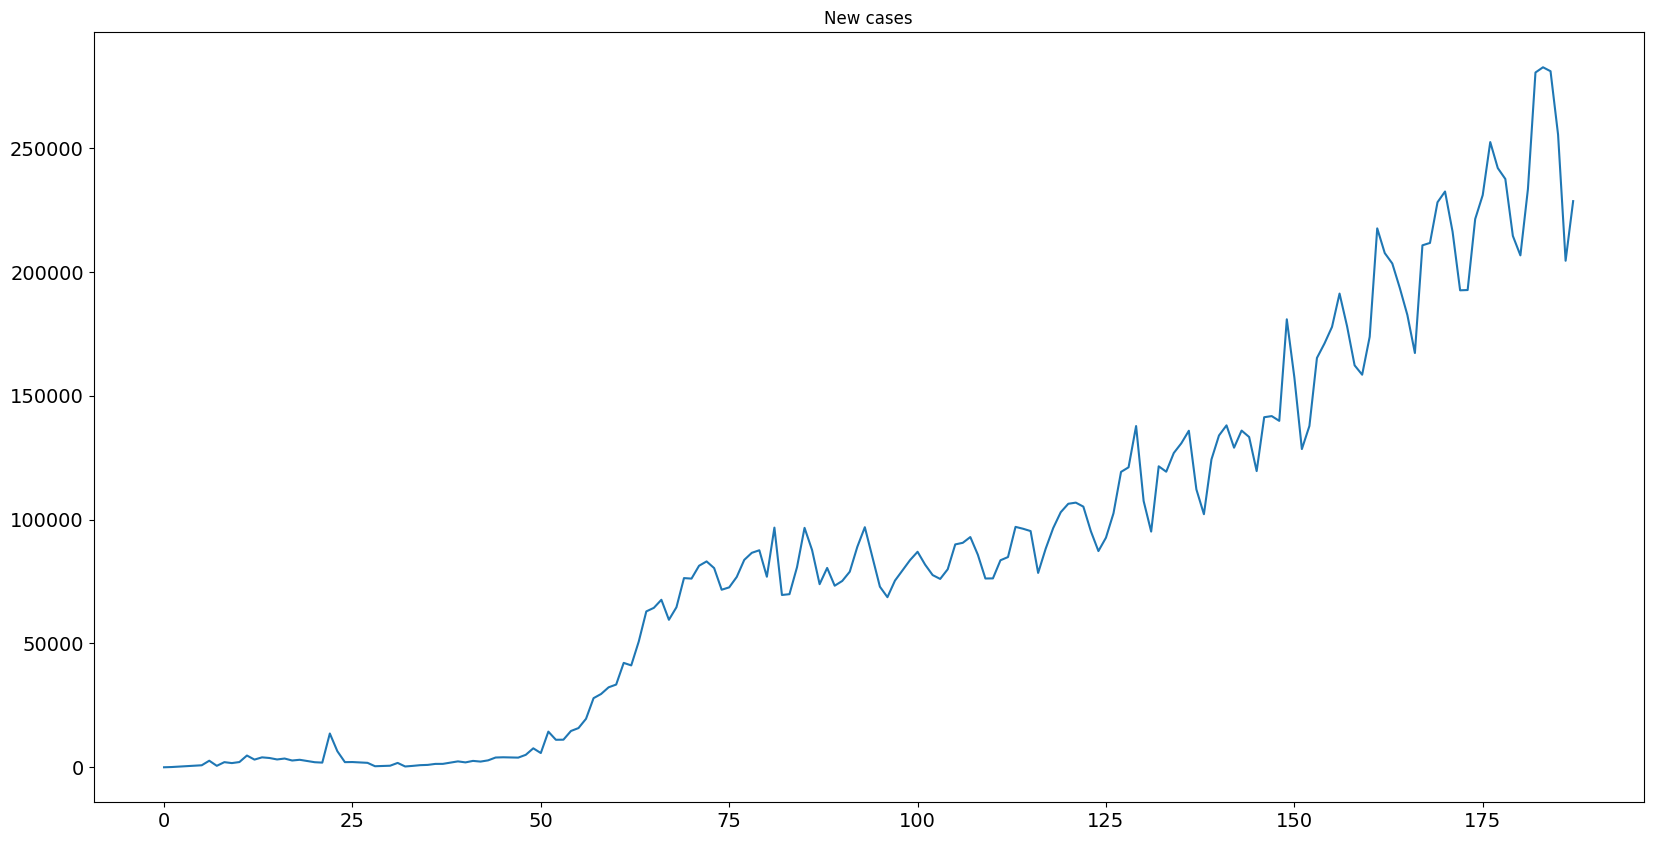

In [189]:
# 画图展示新增确诊的变化曲线
import matplotlib.pyplot as plt
df["New cases"].plot(title="New cases", figsize=(20, 10), fontsize=14)
df.loc[50,"Date"]

<Axes: title={'center': 'Death rate'}>

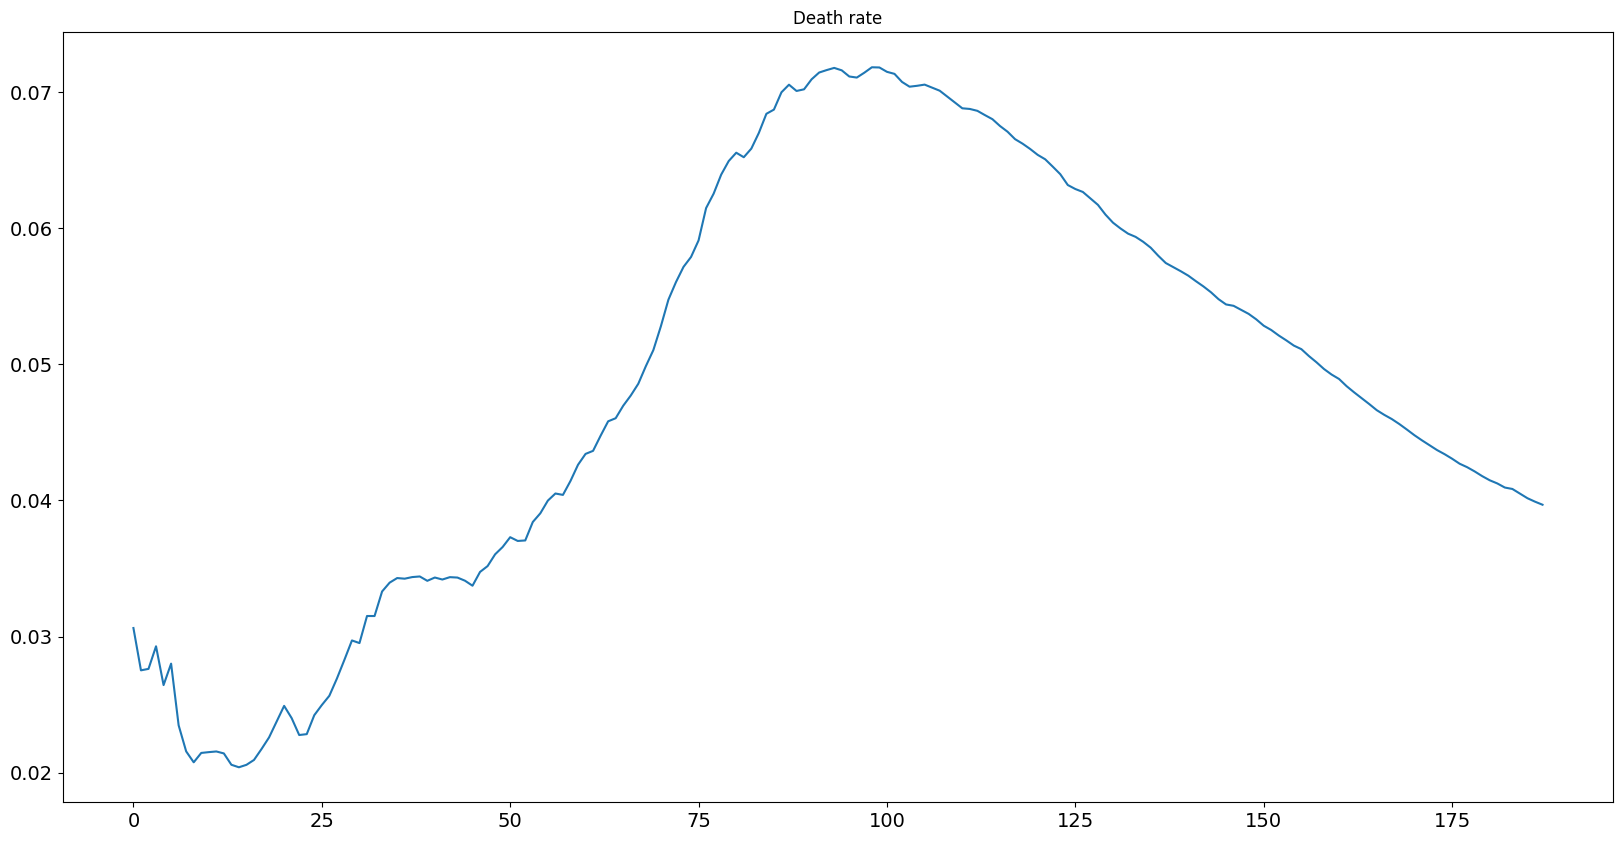

In [190]:
# 画图展示死亡率的变化曲线
df["Death rate"] = df["Deaths"] / df["Confirmed"]
df["Death rate"].plot(title="Death rate", figsize=(20, 10), fontsize=14)

<Figure size 3000x1000 with 0 Axes>

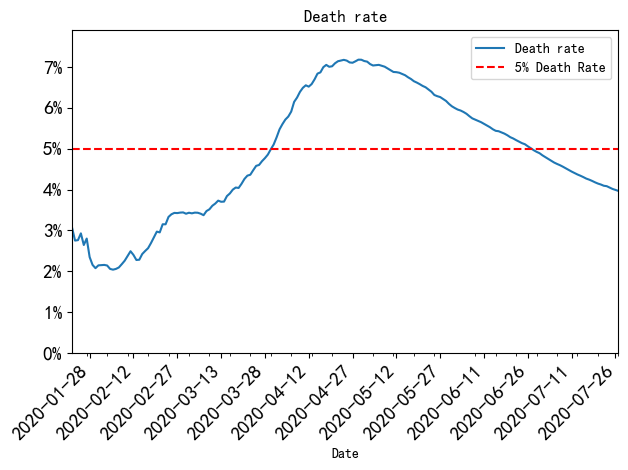

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib import dates as mdates

# 确保日期列已正确转换
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# 计算死亡率
df["Death rate"] = df["Deaths"] / df["Confirmed"]

# 画图
plt.figure(figsize=(30, 10))
ax = df.plot(x='Date', y='Death rate', title="Death rate", fontsize=14)  # 明确指定X轴

# 设置Y轴为百分数格式
ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

# 设置X轴日期格式和间隔
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))  # 每15天一个刻度

# 旋转日期标签
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")

# 设置Y轴范围
ax.set_ylim(0, df["Death rate"].max() * 1.1)

# 添加参考线
plt.axhline(y=0.05, color='r', linestyle='--', label='5% Death Rate')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(df["Date"].dtype)

object
